## HomeWork4
#### 20221141 백채림
유튜브 링크 https://youtu.be/UjXGE4VnobU

#### ------------------------------------------------------------

##### 이미지

In [49]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def run_main():
    frame = cv2.imread('coins.jpg')
    
    height, width = frame.shape[:2]
    print(f"Image size: {width}x{height}")

    roi = frame[0:height, 0:width]

    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    gray_blur = cv2.GaussianBlur(gray, (15, 15), 0)
    
    thresh = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)

    kernel = np.ones((5, 5), np.uint8)
    closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=2)

    contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    coin_count = 0

    for cnt in contours:
        area = cv2.contourArea(cnt)
        if 1000 < area < 4000:
            ellipse = cv2.fitEllipse(cnt)
            aspect_ratio = float(ellipse[1][0]) / ellipse[1][1] 
            if 0.7 < aspect_ratio < 1.3: 
                cv2.ellipse(roi, ellipse, (0, 255, 0), 2) 
                coin_count += 1

    img_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    template = img_gray[190:276, 300:380]
    w, h = template.shape[::-1]

    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
    threshold = 0.8
    loc = np.where(res >= threshold)

    print(f"Detected coins: {coin_count}")

    cv2.imshow("Morphological Closing", closing)
    cv2.imshow("Adaptive Thresholding", thresh)
    cv2.imshow('Contours and Template Matches', roi)

    cv2.waitKey(0)
    cv2.destroyAllWindows()

if __name__ == "__main__":
    run_main()


Image size: 500x500
Detected coins: 5


##### 영상

In [53]:
import cv2
import numpy as np

def run_main():
    cap = cv2.VideoCapture('coinsvideo.mp4')

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        _, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

        # Morphological Closing
        kernel = np.ones((5, 5), np.uint8)
        closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

        # Find contours
        contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # Draw contours on a copy of the original frame
        roi = frame.copy()
        for contour in contours:
            if cv2.contourArea(contour) > 100: 
                x, y, w, h = cv2.boundingRect(contour)
                cv2.rectangle(roi, (x, y), (x + w, y + h), (0, 255, 0), 2)

        # Show the images in separate windows
        cv2.imshow("Morphological Closing", closing)
        cv2.imshow("Adaptive Thresholding", thresh)
        cv2.imshow("Contours", roi)

        if cv2.waitKey(30) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

if __name__ == "__main__":
    run_main()


#### ---------------------------------------------------------------------------------------------

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as pl
from matplotlib import pyplot as plt

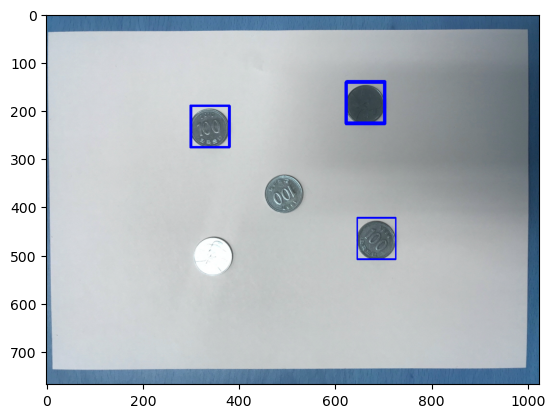

In [7]:
img_rgb = cv2.imread('sIMG_8253.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = img_gray[190:276, 300:380]
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.8

loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv2.imwrite('res.png',img_rgb)

plt.imshow(img_rgb)